### Fit a linear line (multiple linear regression) to the dataset (car price) for the prediction task. Follow all the required pre-processing steps and use all the features available to predict the prices. Also, perform correlation analysis to identify the most relevant features.

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
car_price = pd.read_csv('CarPrice2.csv')

In [8]:
car_price.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### For Encoding

In [9]:
label_encoders = {}

In [ ]:
for column in car_price.columns:
    if car_price[column].dtype == 'object':
        le = LabelEncoder()
        car_price[column] = le.fit_transform(df_original[column])
        label_encoders[column] = le

In [23]:
print("Encoded DataFrame:")
print(df_original)

Encoded DataFrame:
     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0       1.0        3.0      2.0       1.0         0.0         1.0      0.0   
1       2.0        3.0      3.0       1.0         0.0         1.0      0.0   
2       3.0        1.0      1.0       1.0         0.0         1.0      2.0   
3       4.0        2.0      4.0       1.0         0.0         0.0      3.0   
4       5.0        2.0      5.0       1.0         0.0         0.0      3.0   
..      ...        ...      ...       ...         ...         ...      ...   
200   201.0       -1.0    139.0       1.0         0.0         0.0      3.0   
201   202.0       -1.0    138.0       1.0         1.0         0.0      3.0   
202   203.0       -1.0    140.0       1.0         0.0         0.0      3.0   
203   204.0       -1.0    142.0       0.0         1.0         0.0      3.0   
204   205.0       -1.0    143.0       1.0         1.0         0.0      3.0   

     drivewheel  enginelocation  wheelbase  

In [25]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df_original.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

# Fit and transform the numerical data
df_original[numerical_columns] = scaler.fit_transform(df_original[numerical_columns])

print("DataFrame after label encoding and standard scaling:")
print(df_original)

DataFrame after label encoding and standard scaling:
       car_ID  symboling   CarName  fueltype  aspiration  doornumber  \
0   -1.723622   1.743470 -1.838221  0.328798   -0.469295    1.130388   
1   -1.706724   1.743470 -1.813780  0.328798   -0.469295    1.130388   
2   -1.689826   0.133509 -1.862662  0.328798   -0.469295    1.130388   
3   -1.672928   0.938490 -1.789339  0.328798   -0.469295   -0.884652   
4   -1.656029   0.938490 -1.764897  0.328798   -0.469295   -0.884652   
..        ...        ...       ...       ...         ...         ...   
200  1.656029  -1.476452  1.510231  0.328798   -0.469295   -0.884652   
201  1.672928  -1.476452  1.485790  0.328798    2.130854   -0.884652   
202  1.689826  -1.476452  1.534673  0.328798   -0.469295   -0.884652   
203  1.706724  -1.476452  1.583555 -3.041381    2.130854   -0.884652   
204  1.723622  -1.476452  1.607996  0.328798    2.130854   -0.884652   

      carbody  drivewheel  enginelocation  wheelbase  ...  enginesize  \
0   -3.05

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

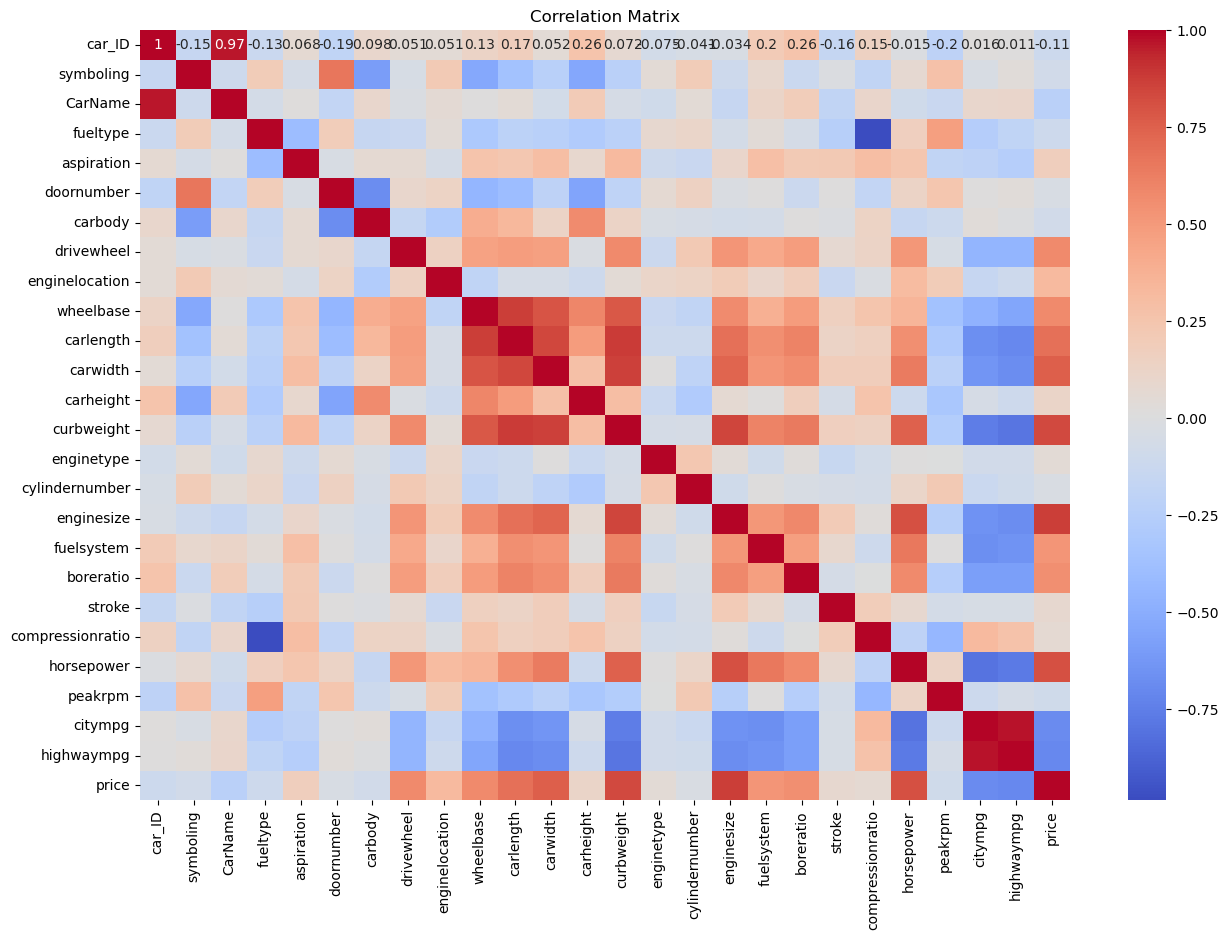

In [26]:
# Compute the correlation matrix
correlation_matrix = df_original.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [40]:
# For identifying columns that are correlated

corr_col = correlation_matrix['price'].sort_values(ascending=False)

corr_col.head(10)

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
drivewheel    0.577992
wheelbase     0.577816
boreratio     0.553173
fuelsystem    0.526823
Name: price, dtype: float64

### Fitting Multiple Linear Regression

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
X = df_original.drop('price', axis=1)
y = df_original['price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
66,-0.608337,-0.671472,-0.420628,-3.041381,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.022697,...,-0.147475,0.170739,-0.126306,0.371023,1.229370,2.992540,-0.814171,-1.944265,0.885740,1.200761
111,0.152084,-0.671472,0.190403,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.522109,...,-0.147475,-0.166277,0.869568,0.482059,-3.405717,-0.439775,-0.231119,-0.262960,-0.953012,-0.982764
153,0.861811,-0.671472,1.070289,0.328798,-0.469295,-0.884652,1.616562,-0.589081,-0.121867,-0.508831,...,-0.147475,-0.840310,-1.122179,-1.035435,-0.720563,-0.288349,-1.067671,-0.683286,0.885740,0.909625
96,-0.101390,0.133509,-0.029568,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,-0.708596,...,-0.147475,-0.719947,-1.122179,-0.665314,0.110556,-0.187398,-0.890221,0.157366,0.885740,0.909625
38,-1.081488,-0.671472,-0.885012,0.328798,-0.469295,1.130388,-0.717207,-0.589081,-0.121867,-0.375655,...,-0.147475,-0.407003,-1.620116,-0.665314,1.037573,-0.288349,-0.459269,1.418345,0.272823,0.327351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.067593,0.133509,-0.176216,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,0.073815,...,1.112210,1.302152,0.869568,0.371023,0.046624,-0.288349,1.416637,0.157366,-0.953012,-0.837195
14,-1.487047,0.133509,-1.520485,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,0.789639,...,1.112210,0.892917,0.869568,-0.073121,-0.209105,-0.288349,0.427984,-1.839184,-0.799782,-0.837195
92,-0.168983,0.133509,-0.029568,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,-0.708596,...,-0.147475,-0.719947,-1.122179,-0.665314,0.110556,-0.187398,-0.890221,0.157366,0.885740,0.909625
179,1.301166,1.743470,1.045847,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,0.689756,...,1.112210,1.061426,0.869568,-0.221170,0.302353,-0.212636,1.441987,0.157366,-0.953012,-0.982764


In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = lr.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
mse

0.1937653414937124

In [39]:
r2

0.8441158536668149